# Market Basket Analysis example

(c) Nuno António 2020 - Rev. 2.00

### Initial setup and modules/packages loading

In [1]:
# Import packages
import csv
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Load and explore data

In [3]:
# Load and show dataset sample (Chain of Asian Restaurant sales January 2018)
dtypes = {'DocNumber':'category','ProductDesignation':'category'}
ds = pd.DataFrame(pd.read_csv("AsianRestaurant_Cyprus_2018_partial.txt",sep=";", dtype=dtypes))
ds.head(20)

,DocNumber,ProductDesignation
0,0110000012018,SWEETCORN SOUP
1,0110000012018,SPRING ROLL
2,0110000012018,EGG FRIED RICE
3,0110000012018,SWEET SOUR CHICKEN
4,0110000012018,LAMB ROGAN JOSH
5,0110000012018,JIRA PULAO
6,0110000012018,NAAN
7,0110000012018,MINERAL WATER 1.5LT
8,0110000012018,BOUTARI MOSCHOFILERO WHITE
9,0110000022018,SPRING ROLL


In [4]:
# Describe dataset
ds.describe()

,DocNumber,ProductDesignation
count,5096,5096
unique,580,203
top,0110002972018,MINERAL WATER 1.5LT
freq,32,632


5096 transactions in 580 documents<br>
203 different Products<br>
Max 32 lines per document<br>
Most sold item "Mineral water 1.5Lt" (632)

### Prepare data for analysis

In [5]:
# Pivot the data - lines as documents and products as columns
pt = pd.pivot_table(ds, index='DocNumber', columns='ProductDesignation', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt.head()

ProductDesignation,NO MEAT,NO ONION,WITH BEEF,WITH CHICKEN,WITH PORK,WITH SHRIMP,1/2 DUCK,1/4 DUCK,1/6 DUCK,7UP,...,VELOUDO RED,VLASSIDES SHIRAZ,VOLCANO MAKI,WHISKY 37.5CL,WHISKY 5CL,WHISKY PREMIUM 5CL,WHOLE DUCK,YELLOW DAL DHABA,ZIVANIA 20CL,ZIVANIA 5CL
DocNumber,,,,,,,,,,,,,,,,,,,,,
0110000012018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110000022018,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110000032018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110000042018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110000052018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Check in how many documents was SPRING ROLL sold
pt['SPRING ROLL'].sum()

214.0

### Model - Apply the Apriori algorithm

In [7]:
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [8]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
574,"(MINERAL WATER 1.5LT, SPRING ROLL, BEEF BBS, ...",(NOODLES WITH MEAT),0.050000,0.198276,0.050000,1.0,5.043478,0.040086,inf
381,"(MINERAL WATER 1.5LT, NO MEAT, TOFFEE BANANA ...",(NOODLES WITH MEAT),0.056897,0.198276,0.056897,1.0,5.043478,0.045615,inf
646,"(EGG FRIED RICE, BEEF BBS, SPRING ROLL, NOODLE...",(MINERAL WATER 1.5LT),0.056897,0.879310,0.056897,1.0,1.137255,0.006867,inf
372,"(MINERAL WATER 1.5LT, NO MEAT, SWEET SOUR CHI...",(NOODLES WITH MEAT),0.068966,0.198276,0.068966,1.0,5.043478,0.055291,inf
407,"(SPRING ROLL, BEEF BBS, 1/4 DUCK)",(MINERAL WATER 1.5LT),0.063793,0.879310,0.063793,1.0,1.137255,0.007699,inf
637,"(EGG FRIED RICE, 1/4 DUCK, BEEF BBS, SPRING ROLL)",(MINERAL WATER 1.5LT),0.050000,0.879310,0.050000,1.0,1.137255,0.006034,inf
420,"(SPRING ROLL, 1/4 DUCK, SWEET SOUR CHICKEN)",(MINERAL WATER 1.5LT),0.050000,0.879310,0.050000,1.0,1.137255,0.006034,inf
363,"(SPRING ROLL, NO MEAT, MINERAL WATER 1.5LT)",(NOODLES WITH MEAT),0.098276,0.198276,0.098276,1.0,5.043478,0.078790,inf
104,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.103448,0.198276,0.103448,1.0,5.043478,0.082937,inf
211,"(EGG FRIED RICE, GLASS WHITE WINE)",(MINERAL WATER 1.5LT),0.051724,0.879310,0.051724,1.0,1.137255,0.006243,inf


In [9]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1052,"(MINERAL WATER 1.5LT, BEEF BBS, NO MEAT)","(EGG FRIED RICE, NOODLES WITH MEAT)",0.056897,0.132759,0.051724,0.909091,6.847698,0.044171,9.539655
1063,"(EGG FRIED RICE, NOODLES WITH MEAT)","(MINERAL WATER 1.5LT, BEEF BBS, NO MEAT)",0.132759,0.056897,0.051724,0.389610,6.847698,0.044171,1.545084
493,"(BEEF BBS, NO MEAT)","(EGG FRIED RICE, NOODLES WITH MEAT)",0.062069,0.132759,0.055172,0.888889,6.695527,0.046932,7.805172
492,"(EGG FRIED RICE, NOODLES WITH MEAT)","(BEEF BBS, NO MEAT)",0.132759,0.062069,0.055172,0.415584,6.695527,0.046932,1.604904
1061,"(BEEF BBS, NO MEAT)","(MINERAL WATER 1.5LT, EGG FRIED RICE, NOODLES ...",0.062069,0.125862,0.051724,0.833333,6.621005,0.043912,5.244828
1054,"(MINERAL WATER 1.5LT, EGG FRIED RICE, NOODLES ...","(BEEF BBS, NO MEAT)",0.125862,0.062069,0.051724,0.410959,6.621005,0.043912,1.592302
1051,"(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)","(BEEF BBS, NOODLES WITH MEAT)",0.091379,0.086207,0.051724,0.566038,6.566038,0.043847,2.105697
1064,"(BEEF BBS, NOODLES WITH MEAT)","(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE)",0.086207,0.091379,0.051724,0.600000,6.566038,0.043847,2.271552
494,"(BEEF BBS, NOODLES WITH MEAT)","(EGG FRIED RICE, NO MEAT)",0.086207,0.098276,0.055172,0.640000,6.512281,0.046700,2.504789
491,"(EGG FRIED RICE, NO MEAT)","(BEEF BBS, NOODLES WITH MEAT)",0.098276,0.086207,0.055172,0.561404,6.512281,0.046700,2.083448


Rules are in the form of "frozensets". Frozensets have functions to check if there are subsets, supersets, etc.<br>
More info at https://www.journaldev.com/22850/python-frozenset


### Explore frequent itemsets

In [11]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [12]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
70,0.212069,"(MINERAL WATER 1.5LT, BEEF BBS)",2
78,0.210345,"(MINERAL WATER 1.5LT, BUFFET SUSHI)",2
95,0.386207,"(EGG FRIED RICE, MINERAL WATER 1.5LT)",2
98,0.237931,"(EGG FRIED RICE, SPRING ROLL)",2
99,0.241379,"(EGG FRIED RICE, SWEET SOUR CHICKEN)",2
118,0.346552,"(SPRING ROLL, MINERAL WATER 1.5LT)",2
120,0.293103,"(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",2
122,0.265517,"(MINERAL WATER 1.5LT, TOFFEE BANANA COMPLEMENT...",2


In [13]:
# Spring Roll and Coke
frequent_itemsets[ frequent_itemsets['itemsets'] == {'SPRING ROLL', 'MINERAL WATER 1.5LT'}]

,support,itemsets,length
118,0.346552,"(SPRING ROLL, MINERAL WATER 1.5LT)",2


In [14]:
# Coke
frequent_itemsets[ frequent_itemsets['itemsets'] == {'COKE'}]

,support,itemsets,length
13,0.086207,(COKE),1


In [15]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.9) & (rulesConfidence['lift'] >= 4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
574,"(MINERAL WATER 1.5LT, SPRING ROLL, BEEF BBS, ...",(NOODLES WITH MEAT),0.050000,0.198276,0.050000,1.000000,5.043478,0.040086,inf
381,"(MINERAL WATER 1.5LT, NO MEAT, TOFFEE BANANA ...",(NOODLES WITH MEAT),0.056897,0.198276,0.056897,1.000000,5.043478,0.045615,inf
372,"(MINERAL WATER 1.5LT, NO MEAT, SWEET SOUR CHI...",(NOODLES WITH MEAT),0.068966,0.198276,0.068966,1.000000,5.043478,0.055291,inf
363,"(SPRING ROLL, NO MEAT, MINERAL WATER 1.5LT)",(NOODLES WITH MEAT),0.098276,0.198276,0.098276,1.000000,5.043478,0.078790,inf
104,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.103448,0.198276,0.103448,1.000000,5.043478,0.082937,inf
622,"(MINERAL WATER 1.5LT, SPRING ROLL, NO MEAT, S...",(NOODLES WITH MEAT),0.058621,0.198276,0.058621,1.000000,5.043478,0.046998,inf
607,"(MINERAL WATER 1.5LT, NO MEAT, EGG FRIED RICE...",(NOODLES WITH MEAT),0.053448,0.198276,0.053448,1.000000,5.043478,0.042851,inf
76,"(BEEF BBS, NO MEAT)",(NOODLES WITH MEAT),0.062069,0.198276,0.062069,1.000000,5.043478,0.049762,inf
355,"(EGG FRIED RICE, NO MEAT, SWEET SOUR CHICKEN)",(NOODLES WITH MEAT),0.058621,0.198276,0.058621,1.000000,5.043478,0.046998,inf
83,"(EGG FRIED RICE, NO MEAT)",(NOODLES WITH MEAT),0.098276,0.198276,0.098276,1.000000,5.043478,0.078790,inf


In [16]:
# High Confidence rules where "BEEF BBS" and "SPRING ROLL" are in the LHS
rulesConfidence[rulesConfidence['antecedents']=={'SPRING ROLL','BEEF BBS'}] # Because rules are a "frozenset" object, the order of items is not important

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(SPRING ROLL, BEEF BBS)",(MINERAL WATER 1.5LT),0.163793,0.879310,0.156897,0.957895,1.089370,0.012872,2.866379
172,"(BEEF BBS, SPRING ROLL)",(EGG FRIED RICE),0.163793,0.417241,0.127586,0.778947,1.866899,0.059245,2.636289
447,"(SPRING ROLL, BEEF BBS)","(MINERAL WATER 1.5LT, EGG FRIED RICE)",0.163793,0.386207,0.124138,0.757895,1.962406,0.060880,2.535232
190,"(SPRING ROLL, BEEF BBS)",(SWEET SOUR CHICKEN),0.163793,0.318966,0.084483,0.515789,1.617070,0.032238,1.406484
485,"(SPRING ROLL, BEEF BBS)","(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",0.163793,0.293103,0.082759,0.505263,1.723839,0.034750,1.428833


In [17]:
# High Confidence rules where "Sweet Sour Chick" is in the RHS
rulesConfidence[['SWEET SOUR CHICKEN' in elem for elem in rulesConfidence['consequents']]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
515,"(EGG FRIED RICE, MINERAL WATER 1.5LT, SESAME P...",(SWEET SOUR CHICKEN),0.098276,0.318966,0.065517,0.666667,2.090090,0.034171,2.043103
244,"(EGG FRIED RICE, SESAME PRAWNS)",(SWEET SOUR CHICKEN),0.105172,0.318966,0.068966,0.655738,2.055826,0.035419,1.978243
536,"(EGG FRIED RICE, SPRING ROLL, NOODLES WITH MEAT)",(SWEET SOUR CHICKEN),0.096552,0.318966,0.060345,0.625000,1.959459,0.029548,1.816092
518,"(EGG FRIED RICE, SESAME PRAWNS)","(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",0.105172,0.293103,0.065517,0.622951,2.125362,0.034691,1.874813
672,"(MINERAL WATER 1.5LT, SPRING ROLL, EGG FRIED R...",(SWEET SOUR CHICKEN),0.094828,0.318966,0.058621,0.618182,1.938084,0.028374,1.783662
...,...,...,...,...,...,...,...,...,...
378,"( NO MEAT, NOODLES WITH MEAT)","(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",0.134483,0.293103,0.068966,0.512821,1.749623,0.029548,1.450998
183,"(MINERAL WATER 1.5LT, BEEF BBS)",(SWEET SOUR CHICKEN),0.212069,0.318966,0.108621,0.512195,1.605801,0.040978,1.396121
485,"(SPRING ROLL, BEEF BBS)","(MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)",0.163793,0.293103,0.082759,0.505263,1.723839,0.034750,1.428833
133,"(EGG FRIED RICE, 1/4 DUCK)",(SWEET SOUR CHICKEN),0.117241,0.318966,0.058621,0.500000,1.567568,0.021225,1.362069


In [18]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1403,(TOFFEE BANANA COMPLEMENTARY),"(EGG FRIED RICE, MINERAL WATER 1.5LT, SWEET SO...",0.289655,0.224138,0.060345,0.208333,0.929487,-0.004578,0.980036
1390,"(EGG FRIED RICE, MINERAL WATER 1.5LT, SWEET SO...",(TOFFEE BANANA COMPLEMENTARY),0.224138,0.289655,0.060345,0.269231,0.929487,-0.004578,0.972051
131,(JIRA PULAO),(MINERAL WATER 1.5LT),0.117241,0.879310,0.096552,0.823529,0.936563,-0.006540,0.683908
130,(MINERAL WATER 1.5LT),(JIRA PULAO),0.879310,0.117241,0.096552,0.109804,0.936563,-0.006540,0.991645
673,(TOFFEE BANANA COMPLEMENTARY),"(EGG FRIED RICE, SWEET SOUR CHICKEN)",0.289655,0.241379,0.065517,0.226190,0.937075,-0.004400,0.980371
668,"(EGG FRIED RICE, SWEET SOUR CHICKEN)",(TOFFEE BANANA COMPLEMENTARY),0.241379,0.289655,0.065517,0.271429,0.937075,-0.004400,0.974983
1398,"(MINERAL WATER 1.5LT, TOFFEE BANANA COMPLEMENT...","(EGG FRIED RICE, SWEET SOUR CHICKEN)",0.265517,0.241379,0.060345,0.227273,0.941558,-0.003746,0.981744
1395,"(EGG FRIED RICE, SWEET SOUR CHICKEN)","(MINERAL WATER 1.5LT, TOFFEE BANANA COMPLEMENT...",0.241379,0.265517,0.060345,0.250000,0.941558,-0.003746,0.979310
91,(COKE),(MINERAL WATER 1.5LT),0.086207,0.879310,0.072414,0.840000,0.955294,-0.003389,0.754310
90,(MINERAL WATER 1.5LT),(COKE),0.879310,0.086207,0.072414,0.082353,0.955294,-0.003389,0.995800


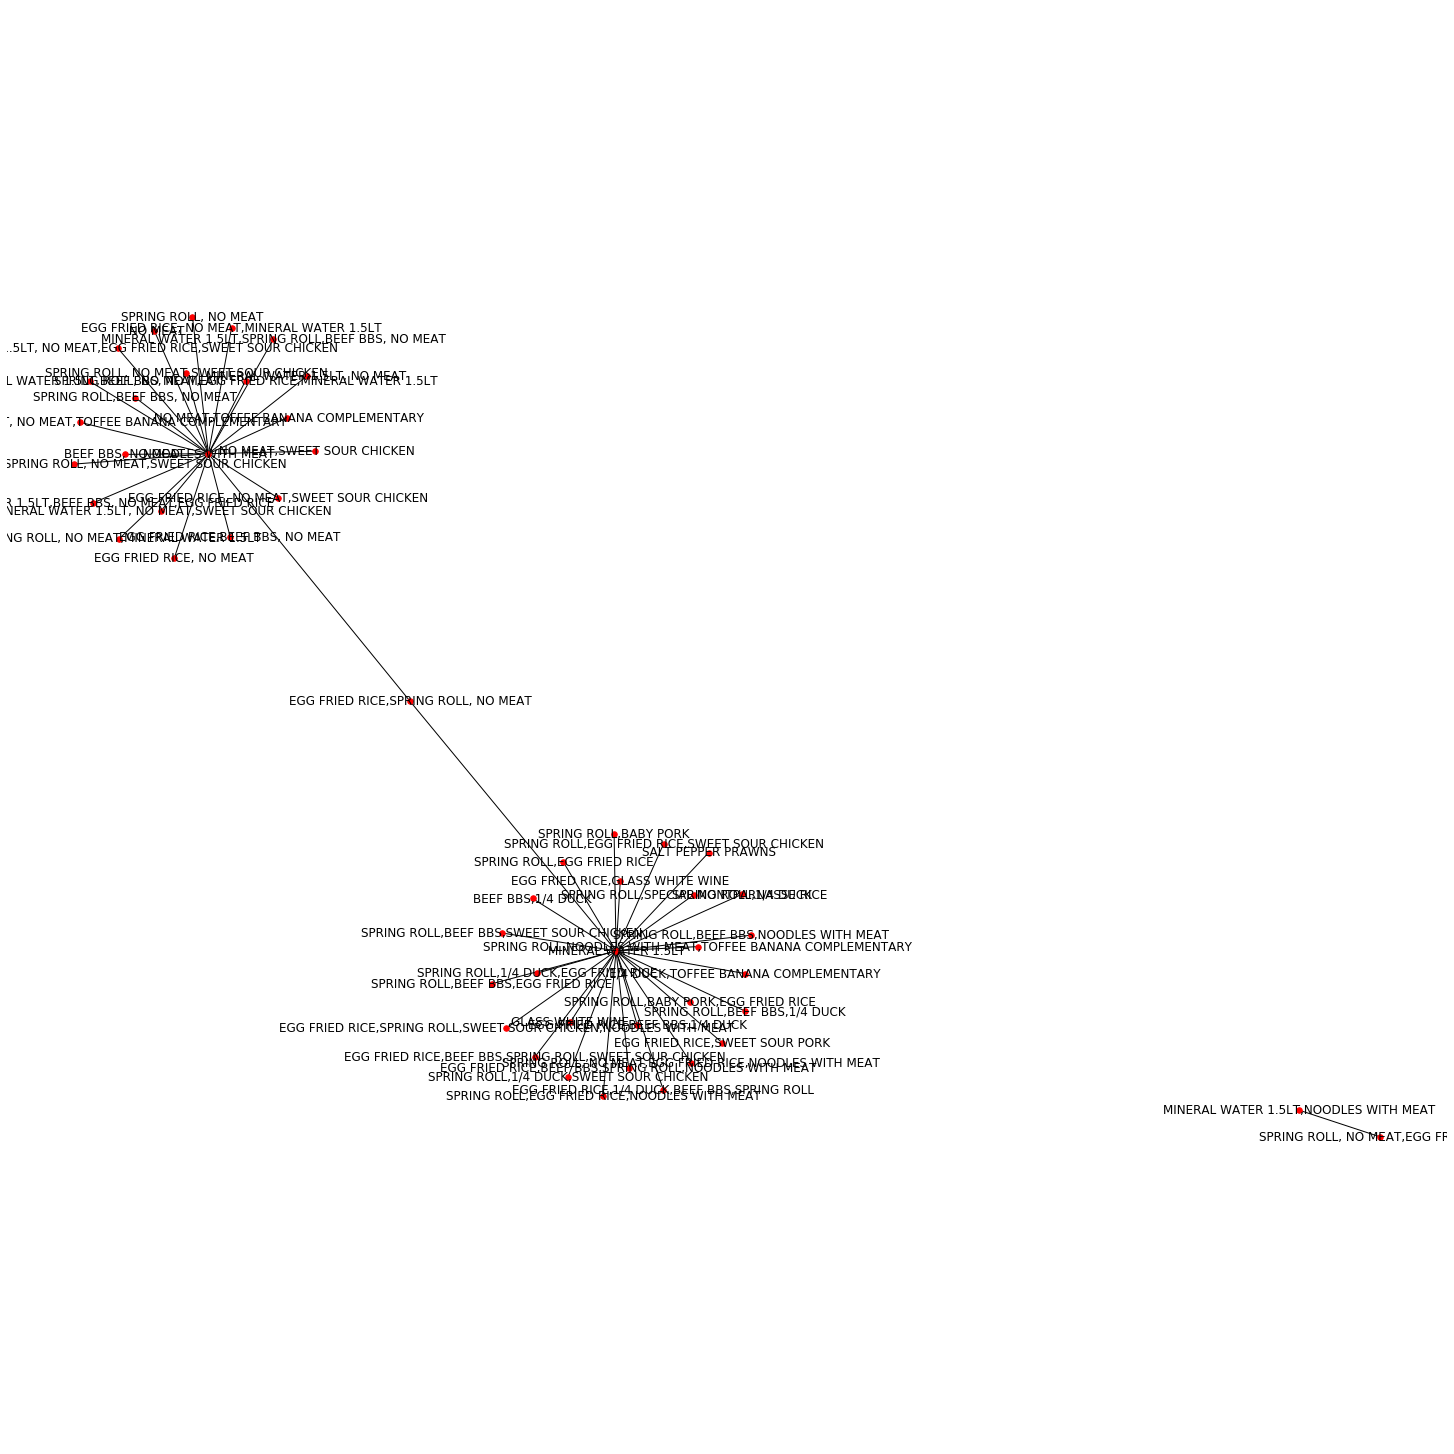

In [19]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G), seed=1234)
plt.axis('equal')
plt.show()